# Solving the differential equation for a non-linear pendulum

This is a VPython notebook to determine numerically the equation for a non-linear pendulum. The equations of motion of  the system are:

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

First, we import the necessary modules to do calculations and plotting:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then we define the initial parameters of the system:

In [2]:
tstart = 0.0
tend = 20.0
N = 1000 # Number of points to plot
h = (tend-tstart)/N # Step length

tpoints = np.arange(tstart, tend, h) # Array of time points
theta_i = 0.99*np.pi
omega_i = 0.0

r = np.array([theta_i,omega_i])

L = 1.0 # String length in m
g = 9.8 # Gravitational acceleration in ms^-2

Then we create a python function (to use as an input to the Runge-Kutta routine) to represent these equations.

In [3]:
def f(r,t):
    '''Definition of the equation of motion to be solved for the pendulum
    Inputs initial position and velocity (as an array) and time t.'''
    
    fomega = (-g/L)*np.sin(r[0])
    ftheta = r[1]
    r = np.array([ftheta,fomega])
    return r

We then define the Runge-Kutta function we'll use to calculate the variation of theta and omega with time.

In [4]:
def RungeKutta2d_f(r,tpoints):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is theta, second omega
            tpoints: array of time values.
    Outputs: [theta_points, omega_points]: solutions for theta(t)
             and omega(t), numpy arrays of same length as tpoints'''
    theta_points = [] # initialise empty arrays
    omega_points = []
    for t in tpoints:
        theta_points.append(r[0])
        omega_points.append(r[1])
        k1 = h*f(r,t) 
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([theta_points, omega_points]) # convert output to numpy array with 2 rows and N columns

In [5]:
rsol_f1 = RungeKutta2d_f(r,tpoints) # this will be an array of the x and y solutions

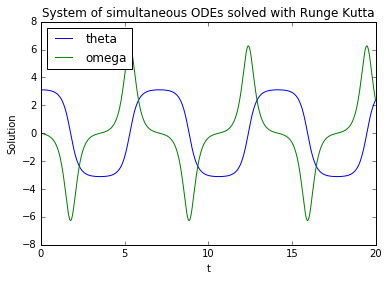

In [6]:
plt.plot(tpoints,rsol_f1[0],label="theta") # the first row of rsol
plt.plot(tpoints,rsol_f1[1],label="omega") # the second row of rsol
plt.legend(loc="best")
plt.title("System of simultaneous ODEs solved with Runge Kutta")
plt.xlabel("t")
plt.ylabel("Solution");

Compare and contrast to the solution using the small angle approximation:

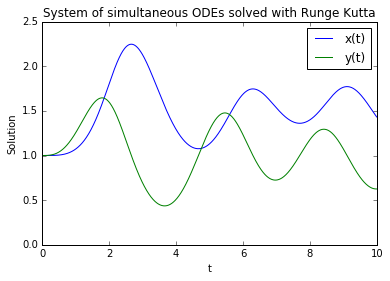

In [7]:
from IPython.display import Image # needed to embed an image
Image(filename='approx.png', embed=True)

There is clearly a significant difference between the two values, and the non-approximate solution clearly resembles more closely the outcome we would expect - displacement greatest when velocity is least, and vice versa.

Now we add a damping term to the system, and redefine f to account for the new expression for angular acceleration:
$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$

In [8]:
c = 0.01 # Damping constant
M = 0.1 # Mass in kg

type(M)
r[1]

0.0

In [9]:
def f2(r,t):
    '''Definition of the equation of motion to be solved for the pendulum
    Inputs initial position and velocity (as an array) and time t.'''
    fomega = (-g/L)*np.sin(r[0]) - (c*r[1]/(M*L*L))
    ftheta = r[1]
    r = np.array([ftheta,fomega])
    return r

In [10]:
def RungeKutta2d_f2(r,tpoints):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is theta, second omega
            tpoints: array of time values.
    Outputs: [theta_points, omega_points]: solutions for theta(t)
             and omega(t), numpy arrays of same length as tpoints'''
    theta_points = [] # initialise empty arrays
    omega_points = []
    for t in tpoints:
        theta_points.append(r[0])
        omega_points.append(r[1])
        k1 = h*f2(r,t) 
        k2 = h*f2(r+0.5*k1, t+0.5*h)
        k3 = h*f2(r+0.5*k2, t+0.5*h)
        k4 = h*f2(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([theta_points, omega_points]) # convert output to numpy array with 2 rows and N columns

In [11]:
rsol_f2 = RungeKutta2d_f2(r,tpoints) # this will be an array of the x and y solutions

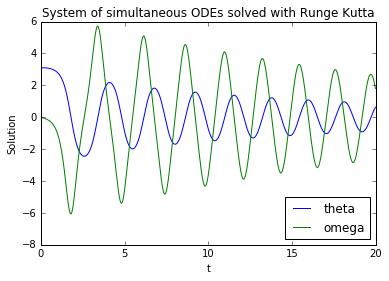

In [12]:
plt.plot(tpoints,rsol_f2[0],label="theta") # the first row of rsol
plt.plot(tpoints,rsol_f2[1],label="omega") # the second row of rsol
plt.legend(loc="best")
plt.title("System of simultaneous ODEs solved with Runge Kutta")
plt.xlabel("t")
plt.ylabel("Solution");

Again, this appears to follow the form we would expect - sinusoidal oscillations of decaying amplitude. Success!

Now, we want to animate the solution using vpython.

In [13]:
from vpython import sphere, cylinder, color, display, rate, vector

### Animate the solution

# first set up the objects:
pivot = vector(0,0,0) # pivot point at centre of display

### For the undamped system:
# the rigid rod connecting the bob to the pivot point...
rod = cylinder(pos=pivot, axis = vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.01, color=color.red)
# ...and the bob.
bob = sphere(pos=vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.1, color=color.blue)


### For the damped system:
# the rigid rod connecting the bob to the pivot point...
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)
# ...and the bob.
bob_d = sphere(pos=vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.1, color=color.cyan, opacity = 0.5)

# Loop over the solution already calculated    
for i in range(0,N):
    
    ## undamped system:
    angle = rsol_f1[0,i] 
    #  change the axis of the bob
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    ## damped system:
    angled = rsol_f2[0,i] 
    #  change the axis of the bob
    rod_d.axis = vector(L*np.sin(angled), -L*np.cos(angled),0)
    #update the position of the bob:
    bob_d.pos = vector(L*np.sin(angled), -L*np.cos(angled),0)
    
    rate(50) # framerate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>